In [79]:
import numpy as np
import librosa
import matplotlib.pyplot as plt

# Load the audio file
audio_path_0= "scream_test_data/s_327.wav"
audio_path_1= "scream_test_data/s_329.wav"

audio_data_0, sr_0 = librosa.load(audio_path_0)
audio_data_1, sr_1= librosa.load(audio_path_1)



In [80]:
print(audio_data_0)
print(audio_data_1)


[ 2.7552955e-05  3.0912357e-05  3.3361113e-05 ... -2.9877247e-05
  1.2004580e-06 -2.1274232e-06]
[-8.2926483e-05 -5.3986609e-05 -1.1818472e-05 ...  6.2661187e-05
  7.2591400e-05  2.7018597e-05]


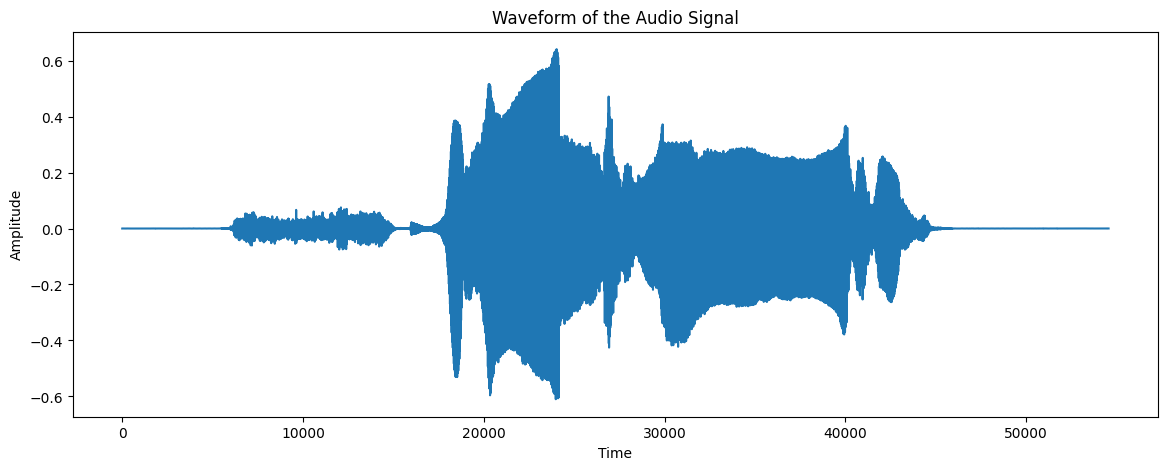

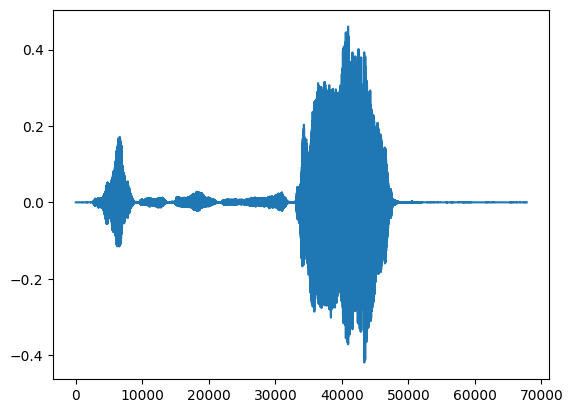

In [81]:

plt.figure(figsize=(14, 5))
plt.plot(audio_data_1)
plt.title('Waveform of the Audio Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()
plt.plot(audio_data_0)
plt.show()

In [82]:
mfccs_0= librosa.feature.mfcc(y=audio_data_0, sr=sr_0, n_mfcc=40)
print(mfccs_0.shape)
mfccs_1 = librosa.feature.mfcc(y=audio_data_1, sr=sr_1, n_mfcc=40)
print(mfccs_1.shape)

(40, 133)
(40, 107)


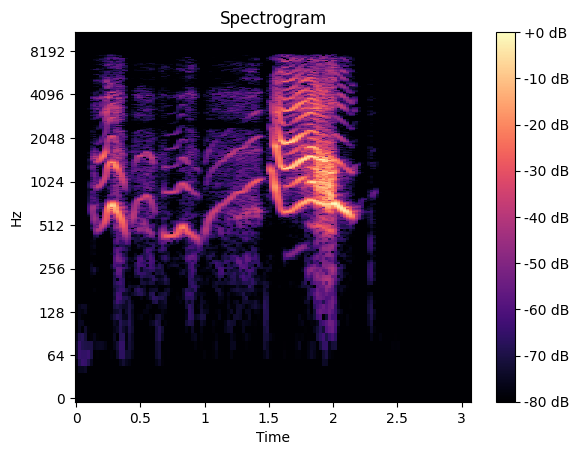

In [83]:
spec = np.abs(librosa.stft(audio_data_0, hop_length=512))
spec = librosa.amplitude_to_db(spec, ref=np.max)
librosa.display.specshow(spec, sr=sr_0, x_axis='time', y_axis='log');
plt.colorbar(format='%+2.0f dB');
plt.title('Spectrogram');


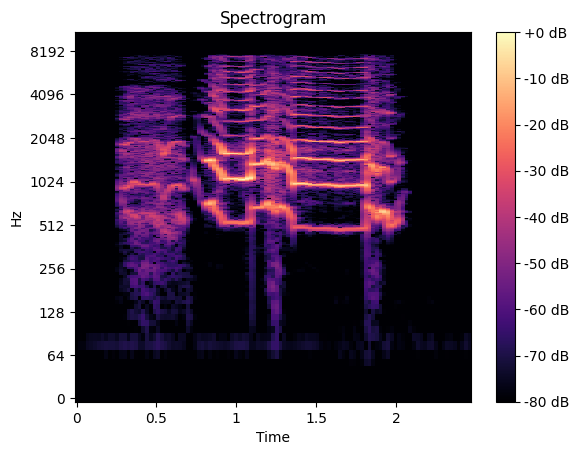

In [84]:
spec = np.abs(librosa.stft(audio_data_1, hop_length=512))
spec = librosa.amplitude_to_db(spec, ref=np.max)
librosa.display.specshow(spec, sr=sr_1, x_axis='time', y_axis='log');
plt.colorbar(format='%+2.0f dB');
plt.title('Spectrogram');

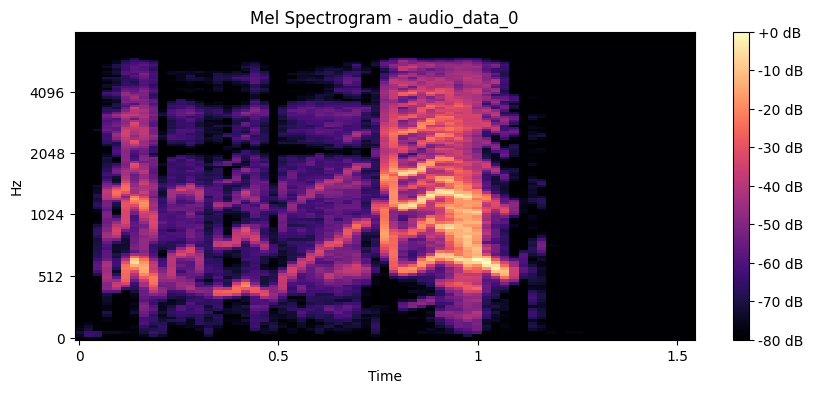

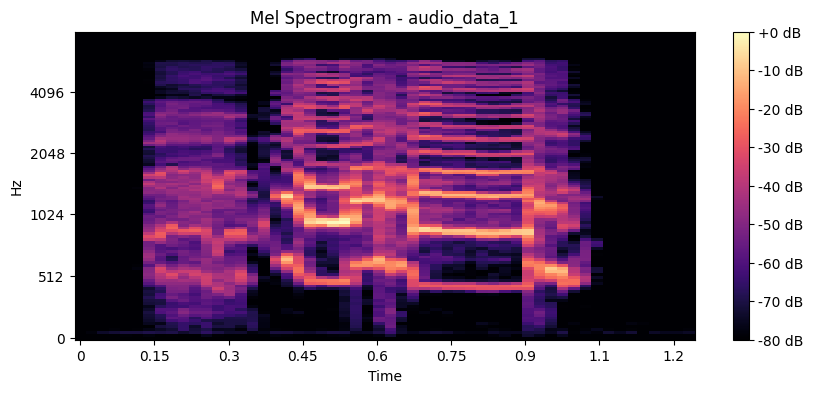

In [85]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

# Load the first audio file
audio_data_0, sr_0 = librosa.load(audio_path_0)
# Compute the mel spectrogram for audio_data_0
mel_spect_0 = librosa.feature.melspectrogram(y=audio_data_0, sr=sr_0, n_fft=2048, hop_length=1024)
mel_spect_0 = librosa.power_to_db(mel_spect_0, ref=np.max)
# Display the mel spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(mel_spect_0, sr=sr_0, y_axis='mel', fmax=8000, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram - audio_data_0')
plt.show()

# Load the second audio file
audio_data_1, sr_1 = librosa.load(audio_path_1)
# Compute the mel spectrogram for audio_data_1
mel_spect_1 = librosa.feature.melspectrogram(y=audio_data_1, sr=sr_1, n_fft=2048, hop_length=1024)
mel_spect_1 = librosa.power_to_db(mel_spect_1, ref=np.max)
# Display the mel spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(mel_spect_1, sr=sr_1, y_axis='mel', fmax=8000, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram - audio_data_1')
plt.show()


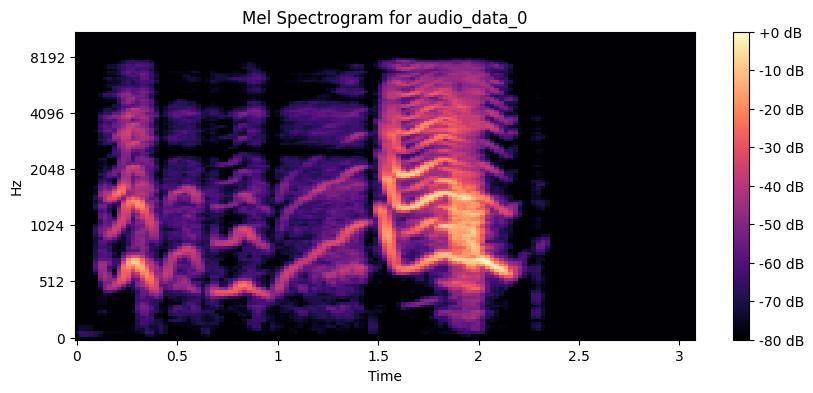

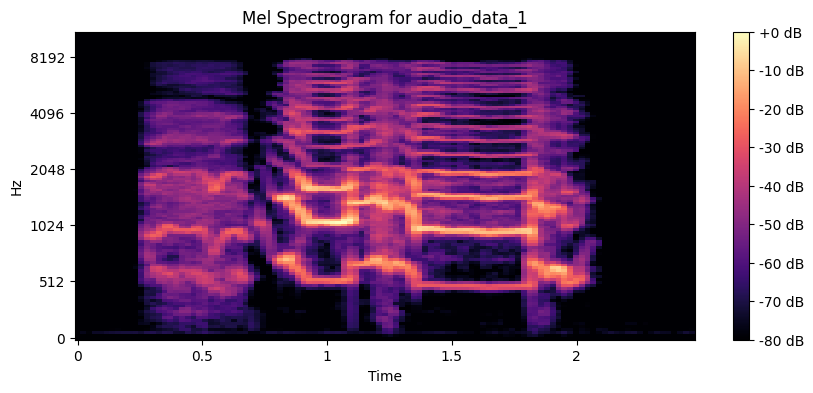

In [86]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

# Load audio files
audio_data_0, sr_0 = librosa.load(audio_path_0)
audio_data_1, sr_1 = librosa.load(audio_path_1)

# Function to compute and display Mel spectrogram
def plot_mel_spectrogram(audio_data, sr, title='Mel Spectrogram'):
    # Compute STFT and apply Mel filterbank
    stft = np.abs(librosa.stft(audio_data))
    mel_spectrogram = librosa.feature.melspectrogram(S=stft, sr=sr, n_mels=128)

    # Convert to dB scale
    mel_spectrogram_db = librosa.amplitude_to_db(mel_spectrogram, ref=np.max)

    # Display the Mel spectrogram
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(mel_spectrogram_db, sr=sr, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title(title)
    plt.show()

# Plot Mel spectrograms for both audio files
plot_mel_spectrogram(audio_data_0, sr_0, title='Mel Spectrogram for audio_data_0')
plot_mel_spectrogram(audio_data_1, sr_1, title='Mel Spectrogram for audio_data_1')


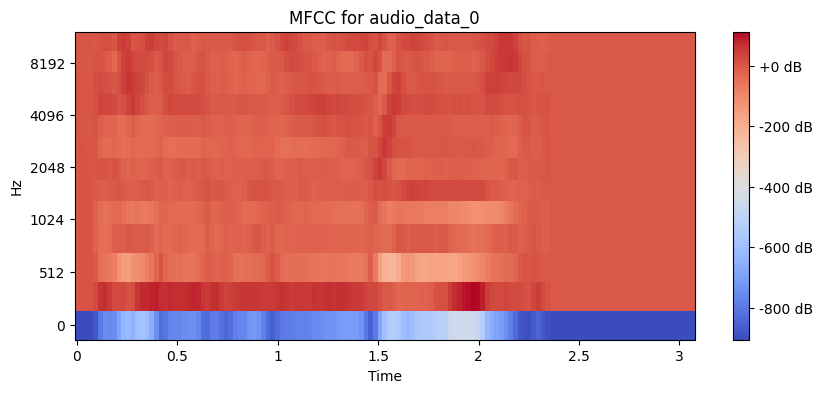

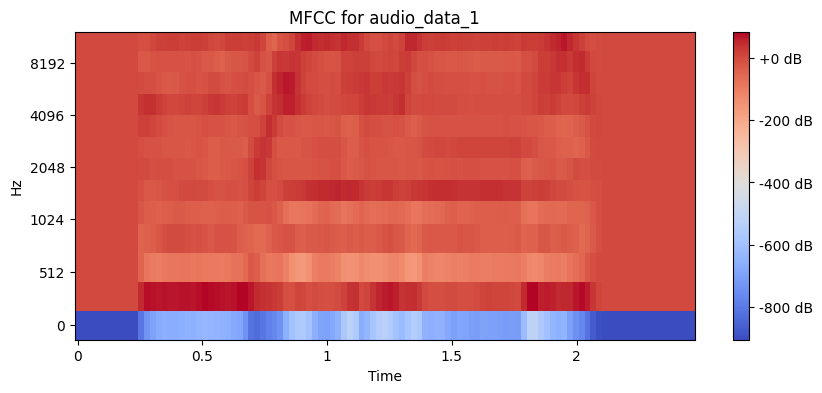

In [87]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

# Load audio files
audio_data_0, sr_0 = librosa.load(audio_path_0)
audio_data_1, sr_1 = librosa.load(audio_path_1)

# Function to compute and display MFCC
def plot_mfcc(audio_data, sr, title='MFCC'):
    # Compute STFT (Short-Time Fourier Transform)
    stft = np.abs(librosa.stft(audio_data))

    # Compute Mel spectrogram from the STFT
    mel_spectrogram = librosa.feature.melspectrogram(S=stft, sr=sr, n_mels=128)

    # Convert to dB scale
    mel_spectrogram_db = librosa.amplitude_to_db(mel_spectrogram, ref=np.max)

    # Compute MFCCs from the Mel spectrogram
    mfccs = librosa.feature.mfcc(S=mel_spectrogram_db, sr=sr, n_mfcc=13)

    # Display the MFCCs
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(mfccs, sr=sr, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title(title)
    plt.show()

# Plot MFCCs for both audio files
plot_mfcc(audio_data_0, sr_0, title='MFCC for audio_data_0')
plot_mfcc(audio_data_1, sr_1, title='MFCC for audio_data_1')


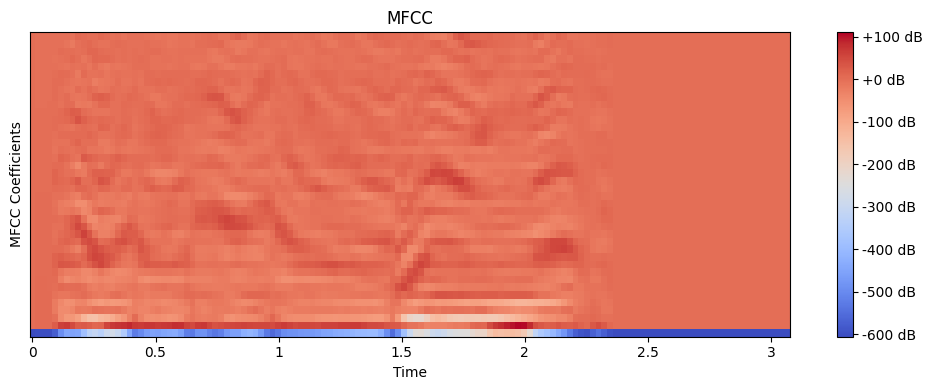

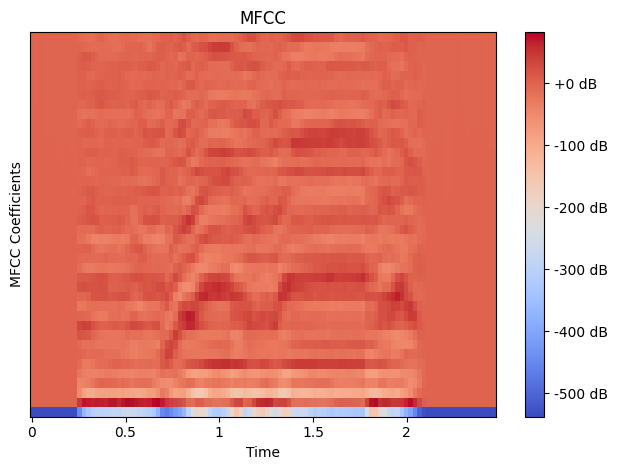

In [88]:
plt.figure(figsize=(10, 4))

librosa.display.specshow(mfccs_0, x_axis='time', sr=sr_0)
plt.colorbar(format='%+2.0f dB')
plt.title('MFCC')
plt.xlabel('Time')
plt.ylabel('MFCC Coefficients')
plt.tight_layout()
plt.show()
librosa.display.specshow(mfccs_1, x_axis='time', sr=sr_1)
plt.colorbar(format='%+2.0f dB')
plt.title('MFCC')
plt.xlabel('Time')
plt.ylabel('MFCC Coefficients')
plt.tight_layout()
plt.show()


Plotting STFT -> Mel Filter Bank -> MFCC


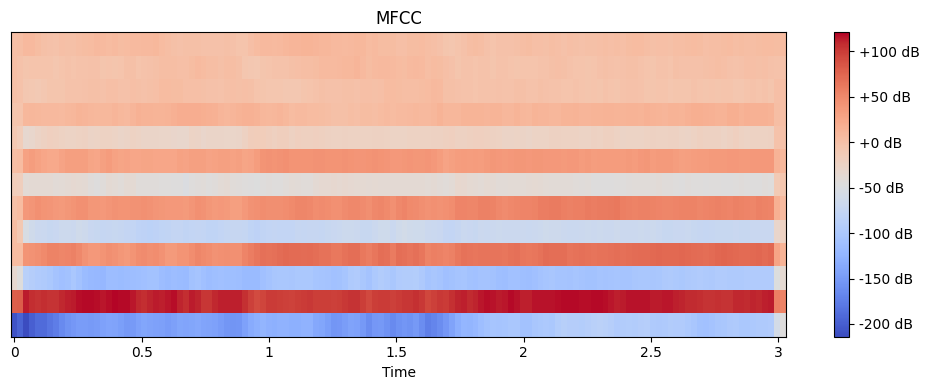

Plotting STFT -> Mel Filter Bank


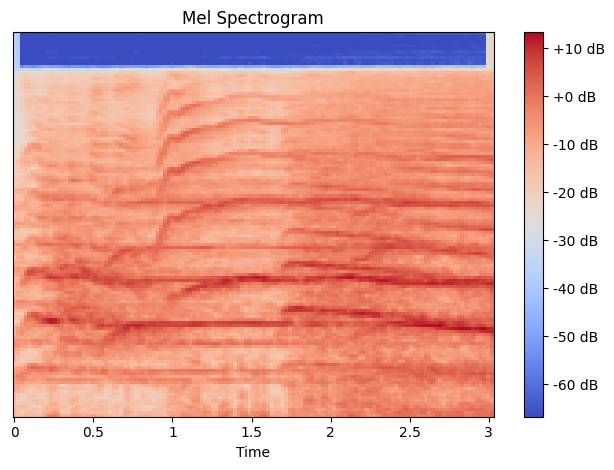

Plotting STFT -> MFCC


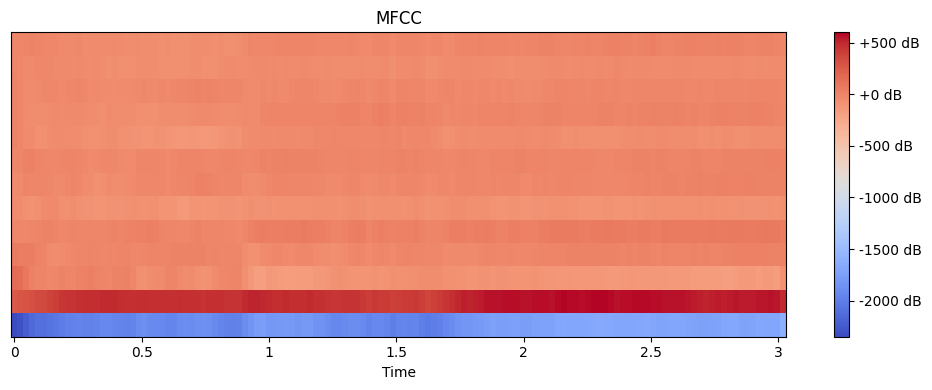

Plotting Direct MFCC


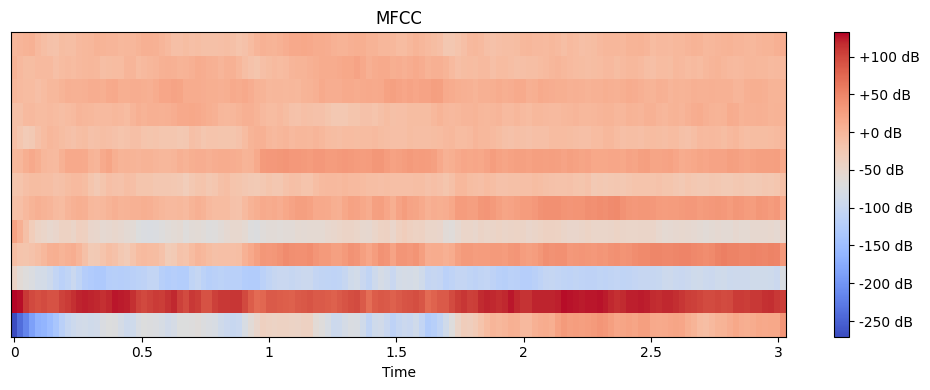

array([[-2.70789825e+02, -2.40196198e+02, -2.16058731e+02, ...,
         1.60998039e+01,  1.59461403e+01,  3.49655609e+01],
       [ 1.32234070e+02,  1.27830170e+02,  1.10143646e+02, ...,
         1.15418236e+02,  1.08708115e+02,  1.07000702e+02],
       [-4.56545944e+01, -6.03273926e+01, -6.71676178e+01, ...,
        -9.06876373e+01, -9.47375717e+01, -7.67403564e+01],
       ...,
       [-7.89861083e-02, -5.28362465e+00, -6.56990862e+00, ...,
         2.71696234e+00,  2.38527465e+00,  1.81106293e+00],
       [ 3.88635159e+00, -3.54572392e+00, -8.38531113e+00, ...,
        -4.94815540e+00, -4.70504951e+00, -4.61806297e+00],
       [-1.56595016e+00,  8.13644230e-01,  4.38991737e+00, ...,
         2.00005507e+00,  6.70853710e+00,  1.06920681e+01]], dtype=float32)

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Function to plot MFCC features
def plot_mfcc(mfcc_features):
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(mfcc_features, x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.title('MFCC')
    plt.tight_layout()
    plt.show()

# Function to extract and plot STFT -> Mel Filter Bank -> MFCC
def stft_mel_mfcc(audio_file, n_fft=2048, hop_length=512, n_mels=128, n_mfcc=13):
    # Load audio file
    y, sr = librosa.load(audio_file)
    
    # Compute STFT
    D = librosa.stft(y, n_fft=n_fft, hop_length=hop_length)
    D_magnitude, _ = librosa.magphase(D)
    
    # Compute Mel Filter Bank
    mel_filter_bank = librosa.filters.mel(sr=sr, n_fft=n_fft, n_mels=n_mels)
    
    # Apply Mel filter bank to STFT result
    mel_spectrogram = np.dot(mel_filter_bank, D_magnitude)
    
    # Compute MFCC
    mfcc = librosa.feature.mfcc(S=librosa.power_to_db(mel_spectrogram), n_mfcc=n_mfcc)
    
    plot_mfcc(mfcc)
    return mfcc, mel_spectrogram

# Function to extract and plot STFT -> Mel Filter Bank
def stft_mel(audio_file, n_fft=2048, hop_length=512, n_mels=128):
    # Load audio file
    y, sr = librosa.load(audio_file)
    
    # Compute STFT
    D = librosa.stft(y, n_fft=n_fft, hop_length=hop_length)
    D_magnitude, _ = librosa.magphase(D)
    
    # Compute Mel Filter Bank
    mel_filter_bank = librosa.filters.mel(sr=sr, n_fft=n_fft, n_mels=n_mels)
    
    # Apply Mel filter bank to STFT result
    mel_spectrogram = np.dot(mel_filter_bank, D_magnitude)
    
    librosa.display.specshow(librosa.power_to_db(mel_spectrogram), x_axis='time', sr=sr)
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel Spectrogram')
    plt.tight_layout()
    plt.show()
    return mel_spectrogram

# Function to extract and plot STFT -> MFCC
def stft_mfcc(audio_file, n_fft=2048, hop_length=512, n_mfcc=13):
    # Load audio file
    y, sr = librosa.load(audio_file)
    
    # Compute STFT
    D = librosa.stft(y, n_fft=n_fft, hop_length=hop_length)
    D_magnitude, _ = librosa.magphase(D)
    
    # Convert to decibels (log scale)
    D_db = librosa.amplitude_to_db(D_magnitude, ref=np.max)
    
    # Compute MFCC
    mfcc = librosa.feature.mfcc(S=D_db, n_mfcc=n_mfcc)
    
    plot_mfcc(mfcc)
    return mfcc

# Function to extract and plot Direct MFCC
def mfcc(audio_file, n_mfcc=13):
    # Load audio file
    y, sr = librosa.load(audio_file)
    
    # Compute MFCC directly
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    
    plot_mfcc(mfcc)
    return mfcc

# File path for the audio
audio_file = "scream_test_data/s_332.wav"

# Generate and plot each feature
print("Plotting STFT -> Mel Filter Bank -> MFCC")
stft_mel_mfcc(audio_file)

print("Plotting STFT -> Mel Filter Bank")
stft_mel(audio_file)

print("Plotting STFT -> MFCC")
stft_mfcc(audio_file)

print("Plotting Direct MFCC")
mfcc(audio_file)
